# #GRIPAPRIL21
## Prediction using Unsupervised ML

### Author : Prince


####  PROBLEM : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Importing the Modules/libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#loading and checking the data
iris_data = datasets.load_iris()
df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df['target'] = iris_data.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


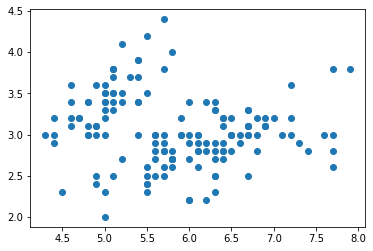

In [3]:
#visualising the data and eyeballing the scaling
plt.scatter(df.iloc[:,0],df.iloc[:,1])

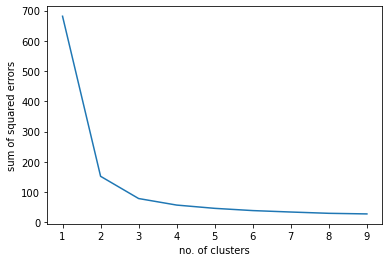

In [4]:
#Finding the optimum number of clusters using the 'Elbow' method.
features = df.iloc[:,0:4].values 

k_rng = range(1,10) #range of optimum number of clusters
sse = []            #Sum of squared errors

for k in k_rng:
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(features)
    sse.append(km.inertia_)

#Plotting the results to visualise the 'elbow'
plt.xlabel('no. of clusters')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse)

In [5]:
#Training the Classifier with n=3 clusters
k_means = KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

#Predicting the targets using classifier
target_predict = k_means.fit_predict(features)

target_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

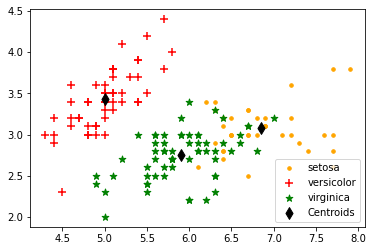

In [6]:
#Visualising the Clusters on Sepal length and width
plt.scatter(features[target_predict == 0, 0], features[target_predict == 0, 1], 
            color = 'orange', label= iris_data.target_names[0], marker='.',  s = 50)

plt.scatter(features[target_predict == 1, 0], features[target_predict == 1, 1], 
            color = 'red', label= iris_data.target_names[1], marker='+', s = 50)

plt.scatter(features[target_predict == 2, 0], features[target_predict == 2, 1], 
            color = 'green', label= iris_data.target_names[2], marker='*', s = 50)

#Plotting the centroids
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 70, c = 'black', label = 'Centroids', marker='d')

plt.legend()
